In [46]:
# Import Libraries
import pandas as pd
import os 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


#### Task 1 - Merge the 12 Months of Data Together

In [22]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# Review code below for study
files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Clean Data!!

In [32]:
# Dealing w/ Nan Values
all_data = nan_df = all_data.dropna(how='all')

In [34]:
# Error coming up in later code due to 'Or' being in the date column - Filter Data to see what's going on
temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']

# Code above has identified where the column names are duplicated to the rows
# Use != to get the code that doesn't have duplicate colun names and set it to the df

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert Columns to Correct data types

In [40]:
# pd.to_numeric is a handy way to make data types numeric without having to specify a float or in

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1377808215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1377808215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


Question 1: What was the best month for Sales? How much was earned that month?
- Clean data
- Create Month Column
- Create Sales Column
- Create Visual for monthly sales data

In [35]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1028818505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data['Order Date'].str[0:2]
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1028818505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add Sales Column

In [39]:
all_data['Sales Value'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1811518951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales Value'] = all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Group the data by month to see which is the top performer

In [52]:
results = all_data.groupby('Month').sum()

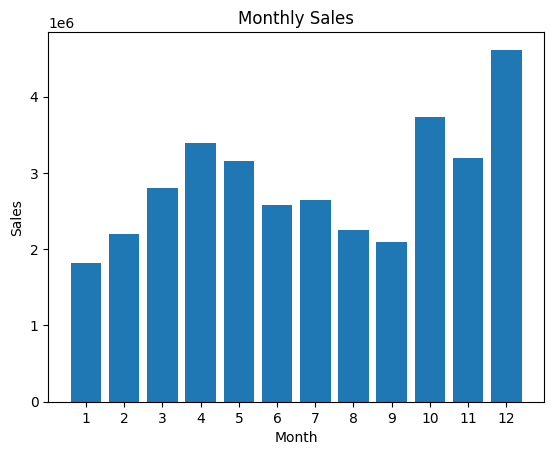

In [55]:
months = range(1,13)

plt.bar(months, results['Sales Value'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(months)
plt.show()